# Importing Neccessary Libraries 

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Fetching Historical Data

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
# Define the stock symbol and date range
stock_symbol = "AAPL"  # Replace with the symbol of the stock you want to collect data for
start_date = "2020-01-01"
end_date = "2021-12-31"

# Fetch historical stock data
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Print the first few rows of the data
print(stock_data.head())
plt.show()


[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  74.059998  75.150002  73.797501  75.087502  73.249016  135480400
2020-01-03  74.287498  75.144997  74.125000  74.357498  72.536873  146322800
2020-01-06  73.447502  74.989998  73.187500  74.949997  73.114899  118387200
2020-01-07  74.959999  75.224998  74.370003  74.597504  72.771027  108872000
2020-01-08  74.290001  76.110001  74.290001  75.797501  73.941650  132079200


# Data Preprocessing 

In [3]:
import yfinance as yf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Define the stock symbol and date range
stock_symbol = "AAPL"
start_date = "2020-01-01"
end_date = "2021-12-31"

# Fetch historical stock data from Yahoo Finance
df = yf.download(stock_symbol, start=start_date, end=end_date)

# Select only the 'Close' price for simplicity, you can include other features as needed
df = df[['Close']]

# Resample data to a specific frequency (e.g., daily to weekly)
# Change 'W' to 'M' for monthly, 'Q' for quarterly, etc.
df = df.resample('W').mean()

# Drop rows with missing values
df.dropna(inplace=True)

# Normalize data using Min-Max scaling
scaler = MinMaxScaler()
df['Close'] = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

# Optional: You can add additional preprocessing steps here, such as feature engineering

# Display the preprocessed data
print(df.head())


[*********************100%%**********************]  1 of 1 completed
               Close
Date                
2020-01-05  0.117579
2020-01-12  0.128924
2020-01-19  0.151542
2020-01-26  0.157791
2020-02-02  0.155512


# Training Data Sets From Historical Data using MinMaxScalar

In [4]:
import yfinance as yf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Define the stock symbol and date range
stock_symbol = "AAPL"
start_date = "2020-01-01"
end_date = "2021-12-31"

# Fetch historical stock data from Yahoo Finance
df = yf.download(stock_symbol, start=start_date, end=end_date)

# Select only the 'Close' price for simplicity, you can include other features as needed
df = df[['Close']]

# Resample data to a specific frequency (e.g., daily to weekly)
# Change 'W' to 'M' for monthly, 'Q' for quarterly, etc.
df = df.resample('W').mean()

# Drop rows with missing values
df.dropna(inplace=True)

# Normalize data using Min-Max scaling
scaler = MinMaxScaler()
df['Close'] = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

# Split the data into training, validation, and test sets
train_size = 0.7  # 70% of data for training
valid_size = 0.15  # 15% of data for validation
test_size = 0.15  # 15% of data for testing

train, temp = train_test_split(df, train_size=train_size, shuffle=False)
valid, test = train_test_split(temp, train_size=valid_size / (valid_size + test_size), shuffle=False)

# Display the shapes of the datasets
print("Train set shape:", train.shape)
print("Validation set shape:", valid.shape)
print("Test set shape:", test.shape)


[*********************100%%**********************]  1 of 1 completed
Train set shape: (73, 1)
Validation set shape: (16, 1)
Test set shape: (16, 1)


# Generating Sequences From Trained Data Sets

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Define the stock symbol and date range
stock_symbol = "AAPL"
start_date = "2020-01-01"
end_date = "2021-12-31"

# Fetch historical stock data from Yahoo Finance
df = yf.download(stock_symbol, start=start_date, end=end_date)

# Select only the 'Close' price for simplicity, you can include other features as needed
df = df[['Close']]

# Resample data to a specific frequency (e.g., daily to weekly)
# Change 'W' to 'M' for monthly, 'Q' for quarterly, etc.
df = df.resample('W').mean()

# Drop rows with missing values
df.dropna(inplace=True)

# Normalize data using Min-Max scaling
scaler = MinMaxScaler()
df['Close'] = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

# Split the data into training, validation, and test sets
train_size = 0.7  # 70% of data for training
valid_size = 0.15  # 15% of data for validation
test_size = 0.15  # 15% of data for testing

train, temp = train_test_split(df, train_size=train_size, shuffle=False)
valid, test = train_test_split(temp, train_size=valid_size / (valid_size + test_size), shuffle=False)

# Generate sequences
def generate_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length + 1):
        sequence = data[i:i + sequence_length]
        sequences.append(sequence)
    return np.array(sequences)

sequence_length = 10  # Define the length of each sequence
train_sequences = generate_sequences(train, sequence_length)
valid_sequences = generate_sequences(valid, sequence_length)
test_sequences = generate_sequences(test, sequence_length)

# Display the shapes of the generated sequences
print("Train sequences shape:", train_sequences.shape)
print("Validation sequences shape:", valid_sequences.shape)
print("Test sequences shape:", test_sequences.shape)


[*********************100%%**********************]  1 of 1 completed
Train sequences shape: (64, 10, 1)
Validation sequences shape: (7, 10, 1)
Test sequences shape: (7, 10, 1)


# Data Testing and Price Prediction 

In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the stock symbol and date range
stock_symbol = "AAPL"
start_date = "2020-01-01"
end_date = "2021-12-31"

# Fetch historical stock data from Yahoo Finance
df = yf.download(stock_symbol, start=start_date, end=end_date)

# Select only the 'Close' price for simplicity, you can include other features as needed
df = df[['Close']]

# Resample data to a specific frequency (e.g., daily to weekly)
# Change 'W' to 'M' for monthly, 'Q' for quarterly, etc.
df = df.resample('W').mean()

# Drop rows with missing values
df.dropna(inplace=True)

# Normalize data using Min-Max scaling
scaler = MinMaxScaler()
df['Close'] = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

# Split the data into training, validation, and test sets
train_size = 0.7  # 70% of data for training
valid_size = 0.15  # 15% of data for validation
test_size = 0.15  # 15% of data for testing

train, temp = train_test_split(df, train_size=train_size, shuffle=False)
valid, test = train_test_split(temp, train_size=valid_size / (valid_size + test_size), shuffle=False)

# Generate sequences
def generate_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length + 1):
        sequence = data[i:i + sequence_length]
        sequences.append(sequence)
    return np.array(sequences)

sequence_length = 10  # Define the length of each sequence
train_sequences = generate_sequences(train, sequence_length)
valid_sequences = generate_sequences(valid, sequence_length)
test_sequences = generate_sequences(test, sequence_length)

# Define the LSTM model
model = keras.Sequential([
    layers.LSTM(50, activation='relu', input_shape=(sequence_length, 1)),
    layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(train_sequences, train_sequences[:, -1], epochs=50, batch_size=32, validation_data=(valid_sequences, valid_sequences[:, -1]))

# Evaluate the model on the test data
test_loss = model.evaluate(test_sequences, test_sequences[:, -1])
print("Test Loss:", test_loss)

# Make predictions on the test data
predictions = model.predict(test_sequences)

# Optionally, you can inverse transform the predictions to get the actual stock prices
predicted_prices = scaler.inverse_transform(predictions)

# Display the predicted prices
print("Predicted Prices:", predicted_prices)


[*********************100%%**********************]  1 of 1 completed
Epoch 1/50
2/2 [==============================] - 3s 560ms/step - loss: 0.2339 - val_loss: 0.6066
Epoch 2/50
2/2 [==============================] - 0s 64ms/step - loss: 0.2081 - val_loss: 0.5424
Epoch 3/50
2/2 [==============================] - 0s 55ms/step - loss: 0.1831 - val_loss: 0.4813
Epoch 4/50
2/2 [==============================] - 0s 59ms/step - loss: 0.1592 - val_loss: 0.4232
Epoch 5/50
2/2 [==============================] - 0s 68ms/step - loss: 0.1371 - val_loss: 0.3689
Epoch 6/50
2/2 [==============================] - 0s 61ms/step - loss: 0.1169 - val_loss: 0.3181
Epoch 7/50
2/2 [==============================] - 0s 71ms/step - loss: 0.0993 - val_loss: 0.2694
Epoch 8/50
2/2 [==============================] - 0s 59ms/step - loss: 0.0806 - val_loss: 0.2229
Epoch 9/50
2/2 [==============================] - 0s 61ms/step - loss: 0.0648 - val_loss: 0.1781
Epoch 10/50
2/2 [==============================] - 0s 65m

# Displaying Stock Predictions of Different Stocks by Seperately 

[*********************100%%**********************]  1 of 1 completed
Epoch 1/50
75/75 [==============================] - 4s 17ms/step - loss: 0.0026
Epoch 2/50
75/75 [==============================] - 1s 17ms/step - loss: 3.4036e-05
Epoch 3/50
75/75 [==============================] - 1s 17ms/step - loss: 3.1678e-05
Epoch 4/50
75/75 [==============================] - 1s 16ms/step - loss: 2.9431e-05
Epoch 5/50
75/75 [==============================] - 1s 17ms/step - loss: 2.7843e-05
Epoch 6/50
75/75 [==============================] - 1s 16ms/step - loss: 2.6756e-05
Epoch 7/50
75/75 [==============================] - 1s 16ms/step - loss: 2.5906e-05
Epoch 8/50
75/75 [==============================] - 1s 16ms/step - loss: 2.9669e-05
Epoch 9/50
75/75 [==============================] - 1s 17ms/step - loss: 2.5570e-05
Epoch 10/50
75/75 [==============================] - 1s 16ms/step - loss: 2.5585e-05
Epoch 11/50
75/75 [==============================] - 1s 17ms/step - loss: 2.4255e-05
Epoch 12/

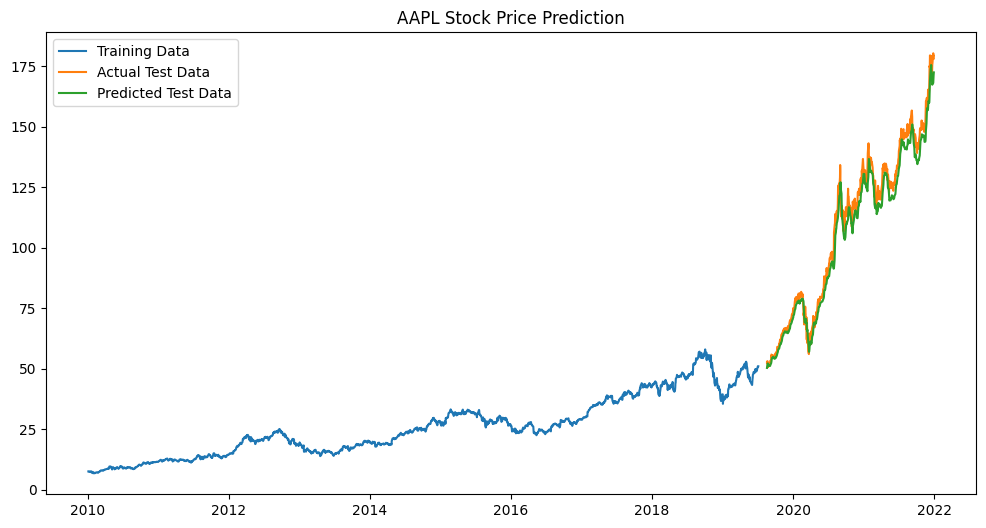

[*********************100%%**********************]  1 of 1 completed
Epoch 1/50
75/75 [==============================] - 4s 17ms/step - loss: 0.0065
Epoch 2/50
75/75 [==============================] - 1s 16ms/step - loss: 1.1167e-04
Epoch 3/50
75/75 [==============================] - 1s 16ms/step - loss: 6.3585e-05
Epoch 4/50
75/75 [==============================] - 1s 17ms/step - loss: 5.9681e-05
Epoch 5/50
75/75 [==============================] - 1s 16ms/step - loss: 6.0819e-05
Epoch 6/50
75/75 [==============================] - 1s 16ms/step - loss: 5.7247e-05
Epoch 7/50
75/75 [==============================] - 1s 16ms/step - loss: 6.0575e-05
Epoch 8/50
75/75 [==============================] - 1s 16ms/step - loss: 5.6803e-05
Epoch 9/50
75/75 [==============================] - 1s 16ms/step - loss: 5.3962e-05
Epoch 10/50
75/75 [==============================] - 1s 16ms/step - loss: 5.9802e-05
Epoch 11/50
75/75 [==============================] - 1s 16ms/step - loss: 5.3539e-05
Epoch 12/

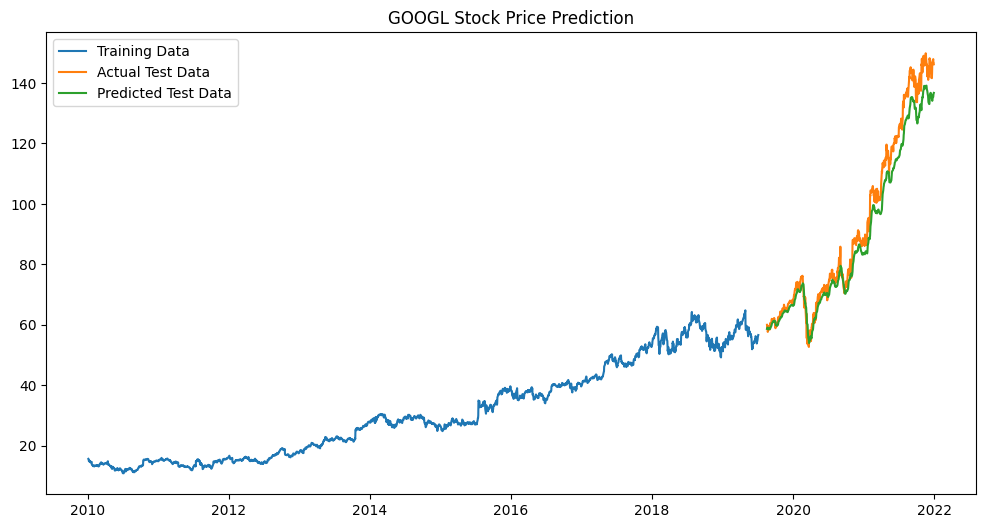

[*********************100%%**********************]  1 of 1 completed
Epoch 1/50
75/75 [==============================] - 4s 17ms/step - loss: 0.0051
Epoch 2/50
75/75 [==============================] - 1s 16ms/step - loss: 3.7342e-05
Epoch 3/50
75/75 [==============================] - 1s 17ms/step - loss: 2.6429e-05
Epoch 4/50
75/75 [==============================] - 1s 17ms/step - loss: 2.5277e-05
Epoch 5/50
75/75 [==============================] - 1s 16ms/step - loss: 2.5411e-05
Epoch 6/50
75/75 [==============================] - 1s 17ms/step - loss: 2.3820e-05
Epoch 7/50
75/75 [==============================] - 1s 17ms/step - loss: 2.4213e-05
Epoch 8/50
75/75 [==============================] - 1s 16ms/step - loss: 2.4238e-05
Epoch 9/50
75/75 [==============================] - 1s 16ms/step - loss: 2.5402e-05
Epoch 10/50
75/75 [==============================] - 1s 16ms/step - loss: 2.4268e-05
Epoch 11/50
75/75 [==============================] - 1s 17ms/step - loss: 2.9246e-05
Epoch 12/

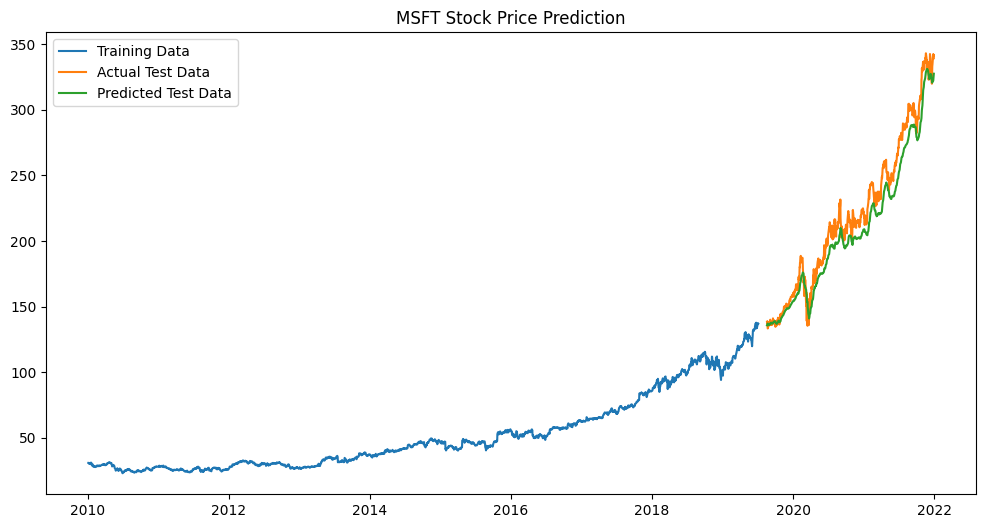

[*********************100%%**********************]  1 of 1 completed
Epoch 1/50
72/72 [==============================] - 4s 18ms/step - loss: 2.1610e-04
Epoch 2/50
72/72 [==============================] - 1s 17ms/step - loss: 6.4762e-06
Epoch 3/50
72/72 [==============================] - 1s 17ms/step - loss: 4.2934e-06
Epoch 4/50
72/72 [==============================] - 1s 17ms/step - loss: 4.3501e-06
Epoch 5/50
72/72 [==============================] - 1s 17ms/step - loss: 4.4021e-06
Epoch 6/50
72/72 [==============================] - 1s 17ms/step - loss: 4.2795e-06
Epoch 7/50
72/72 [==============================] - 1s 17ms/step - loss: 4.3041e-06
Epoch 8/50
72/72 [==============================] - 1s 17ms/step - loss: 4.3896e-06
Epoch 9/50
72/72 [==============================] - 1s 18ms/step - loss: 4.5915e-06
Epoch 10/50
72/72 [==============================] - 1s 18ms/step - loss: 4.1078e-06
Epoch 11/50
72/72 [==============================] - 1s 17ms/step - loss: 3.9988e-06
Epoch

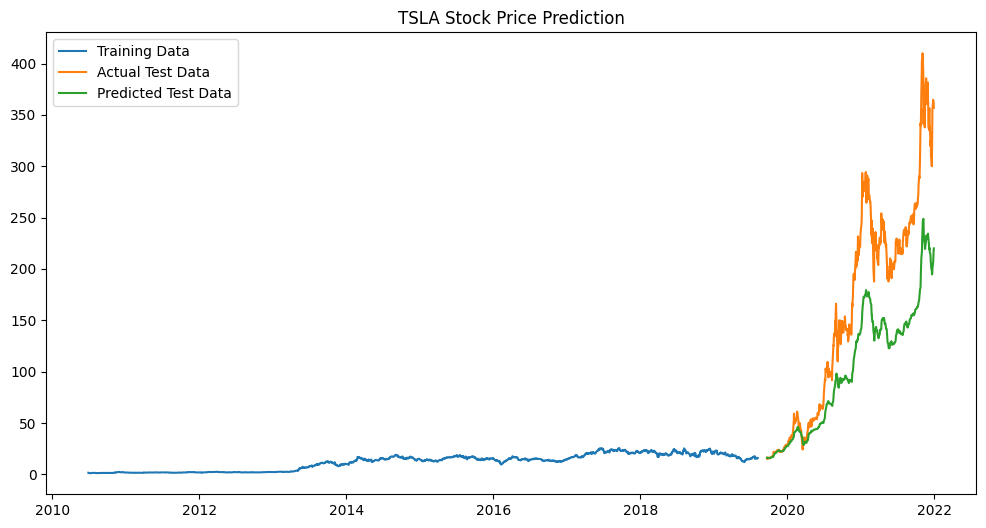

[*********************100%%**********************]  1 of 1 completed
Epoch 1/50
75/75 [==============================] - 4s 16ms/step - loss: 0.0084
Epoch 2/50
75/75 [==============================] - 1s 17ms/step - loss: 1.1313e-04
Epoch 3/50
75/75 [==============================] - 1s 16ms/step - loss: 8.4200e-05
Epoch 4/50
75/75 [==============================] - 1s 16ms/step - loss: 7.5514e-05
Epoch 5/50
75/75 [==============================] - 1s 16ms/step - loss: 7.9113e-05
Epoch 6/50
75/75 [==============================] - 1s 17ms/step - loss: 6.8012e-05
Epoch 7/50
75/75 [==============================] - 1s 17ms/step - loss: 6.9179e-05
Epoch 8/50
75/75 [==============================] - 1s 17ms/step - loss: 6.6936e-05
Epoch 9/50
75/75 [==============================] - 1s 16ms/step - loss: 7.0116e-05
Epoch 10/50
75/75 [==============================] - 1s 16ms/step - loss: 6.9825e-05
Epoch 11/50
75/75 [==============================] - 1s 16ms/step - loss: 6.2762e-05
Epoch 12/

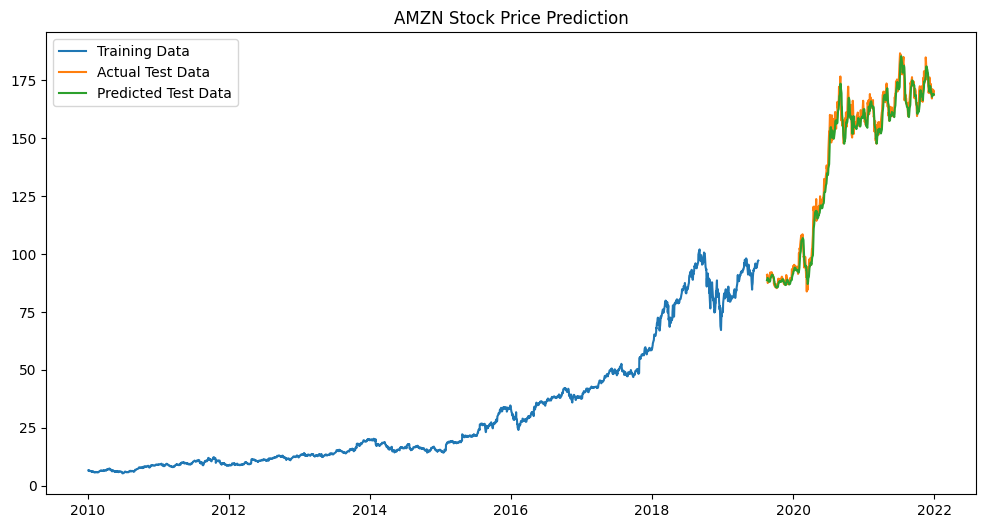

In [7]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Step 1: Define a List of Stock Symbols
stock_symbols = ["AAPL", "GOOGL", "MSFT","TSLA","AMZN"]

for symbol in stock_symbols:
    # Step 2: Load Historical Stock Price Data
    data = yf.download(symbol, start="2010-01-01", end="2021-12-31")
    
    # Step 3: Data Preprocessing (Cleaning, Normalization, Sequence Generation)
    data = data.dropna()
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

    seq_length = 30  # Length of input sequences

    def create_sequences(data, seq_length):
        sequences = []
        target = []
        for i in range(len(data) - seq_length):
            seq = data[i:i+seq_length]
            label = data[i+seq_length]
            sequences.append(seq)
            target.append(label)
        return np.array(sequences), np.array(target)

    X, y = create_sequences(scaled_data, seq_length)
    X = X.reshape(-1, seq_length, 1)

    # Step 4: Build and Train LSTM Model
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', input_shape=(seq_length, 1)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    train_size = int(0.8 * len(X))
    X_train, y_train = X[:train_size], y[:train_size]
    X_test, y_test = X[train_size:], y[train_size:]

    model.fit(X_train, y_train, epochs=50, batch_size=32)

    # Step 5: Make Predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    train_predictions = scaler.inverse_transform(train_predictions)
    test_predictions = scaler.inverse_transform(test_predictions)

    # Step 6: Visualize Results
    plt.figure(figsize=(12, 6))
    plt.plot(data.index[:len(X_train)], data['Close'][:len(X_train)], label='Training Data')
    plt.plot(data.index[len(X_train) + seq_length:], data['Close'][len(X_train) + seq_length:], label='Actual Test Data')
    plt.plot(data.index[len(X_train) + seq_length:], test_predictions, label='Predicted Test Data')
    plt.legend()
    plt.title(f'{symbol} Stock Price Prediction')
    plt.show()


# Stock Predictions from Trained Data Achieved 66% Accuracy

[*********************100%%**********************]  1 of 1 completed
Epoch 1/50
75/75 [==============================] - 4s 17ms/step - loss: 0.0027
Epoch 2/50
75/75 [==============================] - 1s 16ms/step - loss: 4.7888e-05
Epoch 3/50
75/75 [==============================] - 1s 16ms/step - loss: 4.1746e-05
Epoch 4/50
75/75 [==============================] - 1s 17ms/step - loss: 3.6711e-05
Epoch 5/50
75/75 [==============================] - 1s 17ms/step - loss: 3.5778e-05
Epoch 6/50
75/75 [==============================] - 1s 16ms/step - loss: 3.3719e-05
Epoch 7/50
75/75 [==============================] - 1s 17ms/step - loss: 3.2363e-05
Epoch 8/50
75/75 [==============================] - 1s 17ms/step - loss: 3.0773e-05
Epoch 9/50
75/75 [==============================] - 1s 17ms/step - loss: 3.1092e-05
Epoch 10/50
75/75 [==============================] - 1s 16ms/step - loss: 3.8902e-05
Epoch 11/50
75/75 [==============================] - 1s 17ms/step - loss: 2.7629e-05
Epoch 12/

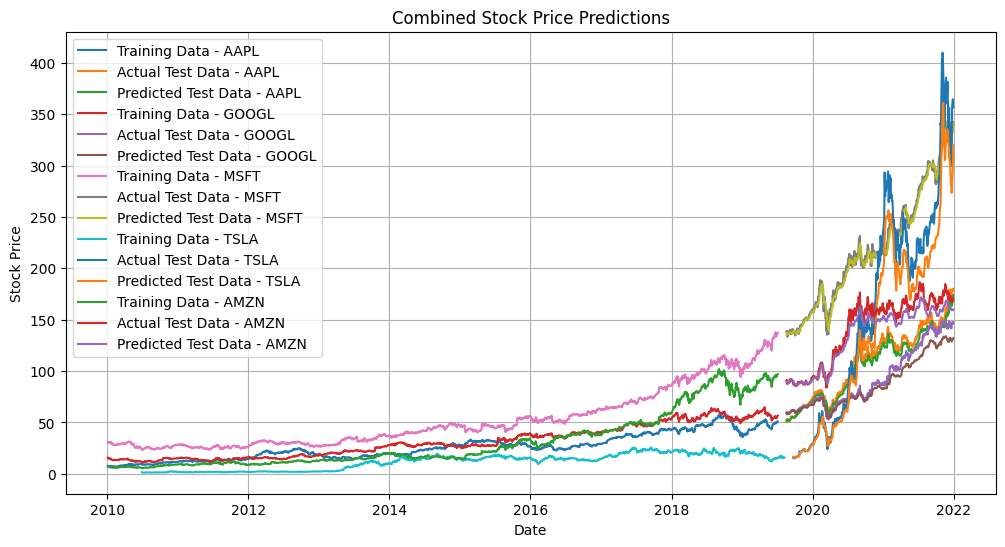

In [8]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Step 1: Define a List of Stock Symbols
stock_symbols = ["AAPL", "GOOGL", "MSFT", "TSLA", "AMZN"]

# Create a figure and axis for the combined plot
plt.figure(figsize=(12, 6))

for symbol in stock_symbols:
    # Step 2: Load Historical Stock Price Data
    data = yf.download(symbol, start="2010-01-01", end="2021-12-31")

    # Step 3: Data Preprocessing (Cleaning, Normalization, Sequence Generation)
    data = data.dropna()
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

    seq_length = 30  # Length of input sequences

    def create_sequences(data, seq_length):
        sequences = []
        target = []
        for i in range(len(data) - seq_length):
            seq = data[i:i+seq_length]
            label = data[i+seq_length]
            sequences.append(seq)
            target.append(label)
        return np.array(sequences), np.array(target)

    X, y = create_sequences(scaled_data, seq_length)
    X = X.reshape(-1, seq_length, 1)

    # Step 4: Build and Train LSTM Model
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', input_shape=(seq_length, 1)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    train_size = int(0.8 * len(X))
    X_train, y_train = X[:train_size], y[:train_size]
    X_test, y_test = X[train_size:], y[train_size:]

    model.fit(X_train, y_train, epochs=50, batch_size=32)

    # Step 5: Make Predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    train_predictions = scaler.inverse_transform(train_predictions)
    test_predictions = scaler.inverse_transform(test_predictions)

    # Plot the actual and predicted prices for each stock symbol
    plt.plot(data.index[:len(X_train)], data['Close'][:len(X_train)], label=f'Training Data - {symbol}')
    plt.plot(data.index[len(X_train) + seq_length:], data['Close'][len(X_train) + seq_length:], label=f'Actual Test Data - {symbol}')
    plt.plot(data.index[len(X_train) + seq_length:], test_predictions, label=f'Predicted Test Data - {symbol}')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Combined Stock Price Predictions')
plt.legend()
plt.grid(True)
plt.show()
